In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##### !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

##### !curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

In [3]:
df = pd.read_csv("FuelConsumption.csv")

##### Model Yılı (MODELYEAR): Tüm araçların model yılı 2014'tür.
##### Motor Hacmi (ENGINESIZE): Motor hacmi ortalaması 3.35 birimdir.
##### Silindir Sayısı (CYLINDERS): Ortalama silindir sayısı 5.79'dur.
##### Şehir İçi Yakıt Tüketimi (FUELCONSUMPTION_CITY): Şehir içi yakıt tüketimi ortalaması 13.30 birimdir.
##### Şehir Dışı Yakıt Tüketimi (FUELCONSUMPTION_HWY): Şehir dışı yakıt tüketimi ortalaması 9.47 birimdir.
##### Kombin Yakıt Tüketimi (FUELCONSUMPTION_COMB): Kombin yakıt tüketimi ortalaması 11.58 birimdir.
##### Kombin Yakıt Tüketimi MPG (FUELCONSUMPTION_COMB_MPG): Kombin yakıt tüketimi MPG ortalaması 26.44 birimdir.
##### CO2 Emisyonları (CO2EMISSIONS): CO2 emisyonları ortalaması 256.23 birimdir.

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [9]:
cdf.head(10) # var olan bir dataFrame'den yeni bir dataFrame oluşturulup ilk 10 elemanı ekranada gösterildi

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


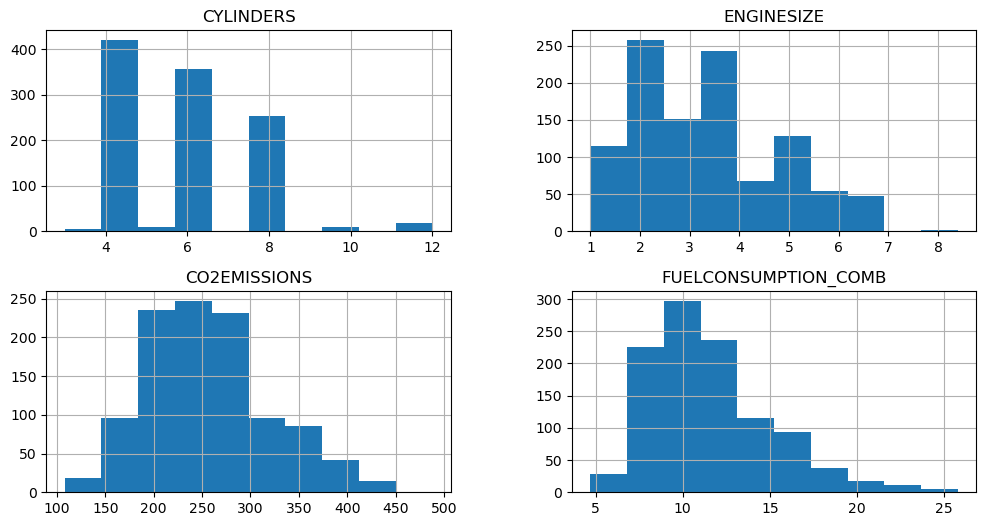

In [7]:
plt.rcParams['figure.figsize'] = (12,6)

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

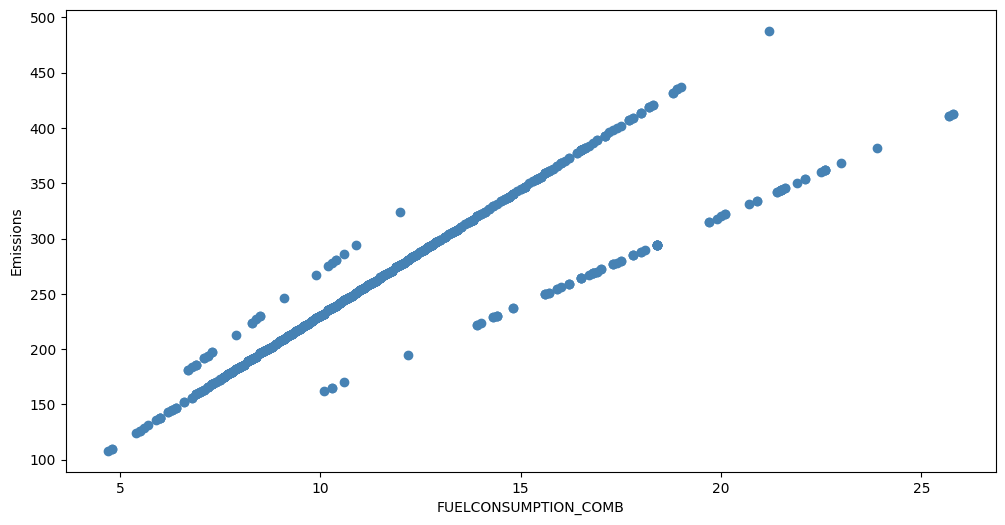

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emissions")
plt.show()

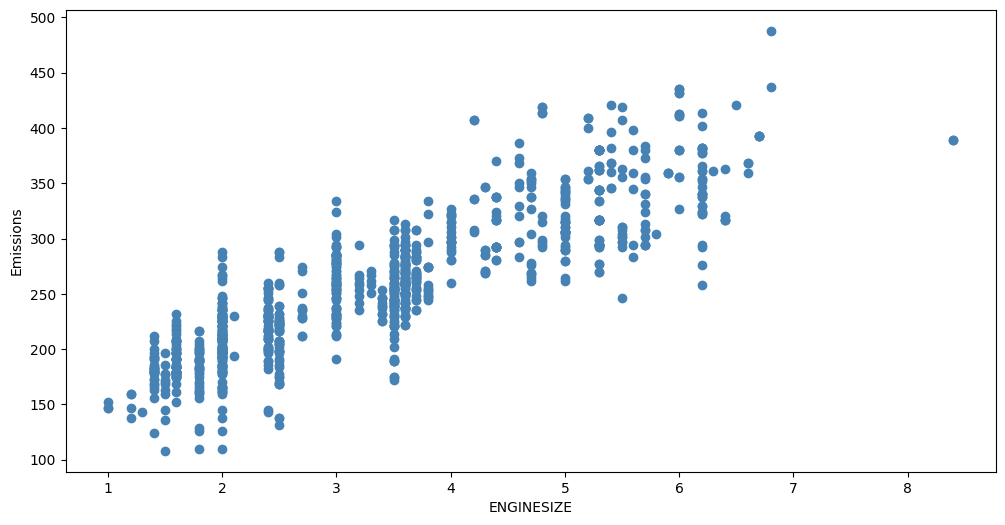

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

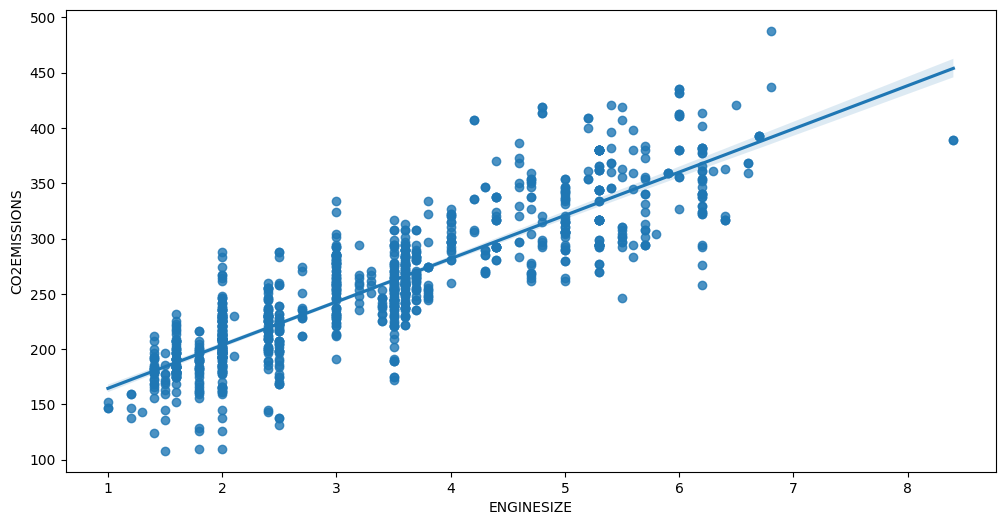

In [22]:
import seaborn as sns

sns.regplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])

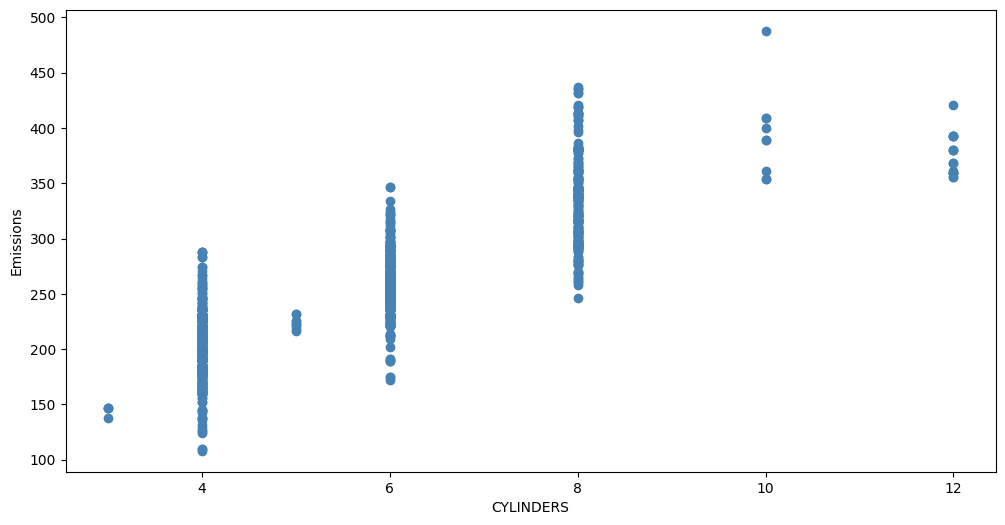

In [12]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("CYLINDERS")
plt.ylabel("Emissions")
plt.show()

In [10]:
msk = np.random.rand(len(df)) < 0.8
# Veri setinin satır sayısı kadar rastgele sayı üretir ve her bir sayı 0 ile 1 arasında olur. 
# Ardından, bu rastgele sayılar 0.8'den küçük olanlara True, büyük veya eşit olanlara False atanır. 
# Sonuç olarak bu ifade, veri setinin %80'ini kapsayan bir mask (maske) oluşturur
train = cdf[msk]
test = cdf[~msk]

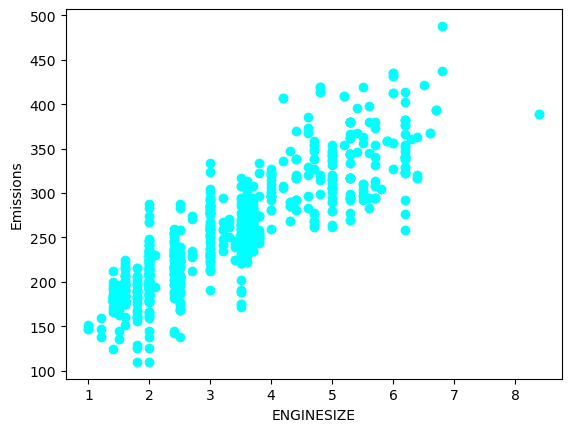

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

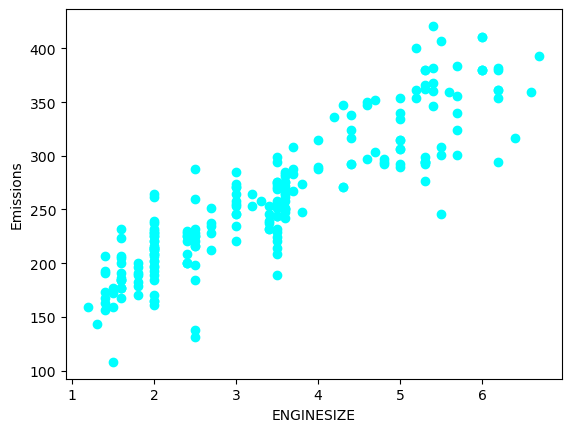

In [19]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

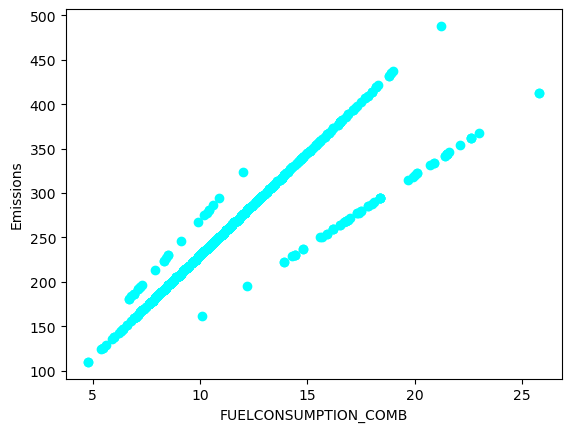

In [20]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color="cyan")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emissions")
plt.show()

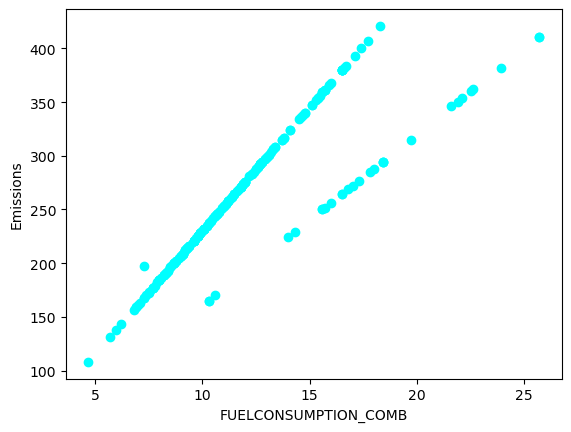

In [21]:
plt.scatter(test.FUELCONSUMPTION_COMB, test.CO2EMISSIONS, color="cyan")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emissions")
plt.show()

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

In [24]:
print(regr.coef_)
print(regr.intercept_)

[[16.59292583]]
[64.8993538]


# Model evaluation metrics:
- Mean Absolute Error
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

In [25]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [26]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [27]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 21.86
Residual sum of squares (MSE): 1005.15
R2-score: 0.76


### ------------------------------------------- TODO  ---------------------------------------------------

In [28]:
mdf = df[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]

In [29]:
mdf.head(10)

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,9.9,6.7,8.5,33,196
1,11.2,7.7,9.6,29,221
2,6.0,5.8,5.9,48,136
3,12.7,9.1,11.1,25,255
4,12.1,8.7,10.6,27,244
5,11.9,7.7,10.0,28,230
6,11.8,8.1,10.1,28,232
7,12.8,9.0,11.1,25,255
8,13.4,9.5,11.6,24,267
9,10.6,7.5,9.2,31,212


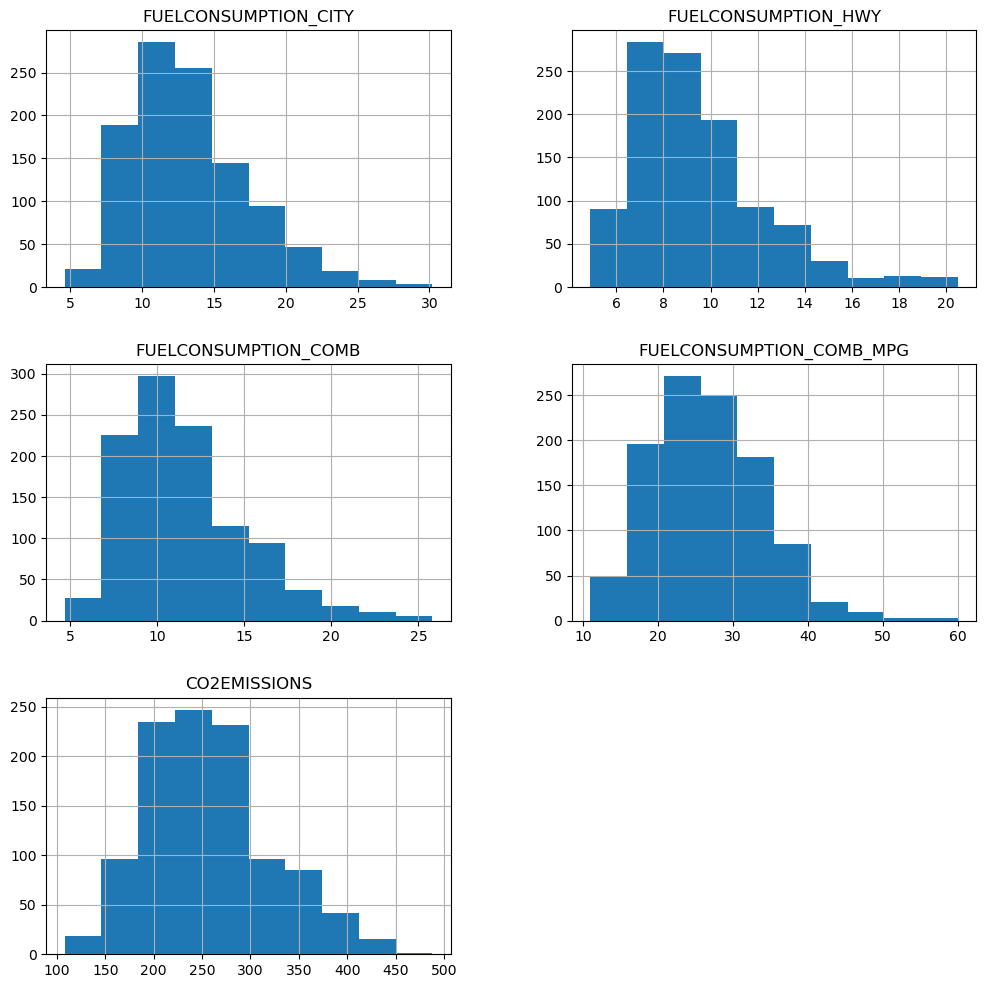

In [32]:
plt.rcParams['figure.figsize'] = (12,12)

viz = mdf[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
viz.hist()
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [44]:
# İlgili özellikler seçilir
features = ['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']

In [45]:
# Bağımlı ve bağımsız değişkenler tanımlanır
X = mdf[features]
y = mdf['CO2EMISSIONS']

In [90]:
# Veriler test ve eğitim setleri olarak ayrılır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [91]:
# Model oluşturulur ve eğitilir
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [92]:
# Tahmin yaptırılır
y_pred = model.predict(X_test)

In [93]:
# Model performansı değerlendirilir
print('Ortalama Mutlak Hata (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Ortalama Kare Hata (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Kök Ortalama Kare Hata (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Ortalama Mutlak Hata (MAE): 15.387518839314193
Ortalama Kare Hata (MSE): 567.8864824705781
Kök Ortalama Kare Hata (RMSE): 23.830368911760015


In [96]:
# Katsayılar ve sabit (intercept) değerlere bakılır
coefficients = pd.DataFrame({'Katsayılar': model.coef_}, index=features)
intercept = model.intercept_
print('\nKatsayılar:\n', coefficients)
print('\nSabit (Intercept):', intercept)


Katsayılar:
                           Katsayılar
FUELCONSUMPTION_CITY       -0.459166
FUELCONSUMPTION_HWY        -7.215859
FUELCONSUMPTION_COMB       13.321990
FUELCONSUMPTION_COMB_MPG   -4.551317

Sabit (Intercept): 295.9363403273158
